# TABLE OF CONTENTS 

1. Amazon Stock-Data Pipeline



2. Data Analysis 

      2.1 Data Exploration Analysis
      
      2.2 Data Exploration Analysis-Outlier Detection & Distribution
      
      
      
3. Feature Engineering

      3.1 Historical stock price movements  
      
      3.2 Amazon Stock Perfomance
      
      3.3 Stock Market indicators (RSI)
      
      3.4 Volume of trades
      
      3.5 Stock prices moving average
      
      3.6 Pairplot :Establish relationships,patterns and correlation
      
      
      
4. Data Pre-processing 

      4.1 Dropping outlier data/unrelated data(improve model perfomance)
      
      4.2 Data Normalisation
      
      
      
5. Data Modelling 

      5.1 Data Modelling-Keras (time series)
      
      5.2 Model prediction
      
      5.3 Model Optimization
      
      
      
6. Model Summary 

      6.1 Model outcome
      
      6.2 Project Summary/Conclusion


In [7]:
import yfinance as yahoo_finance
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from ta.momentum import RSIIndicator

# 1.AMAZON STOCK DATA PIPELINE 

Amazon stock prices data would be fetched directly from the yahoo finance 

Data fetched would mantain a 10 year period,from 10 years ago until now.

All the variables(Open, High, Low, and Close prices) are auto_adjusted, By adjusting the historical prices for dividends and splits, it computes a scaling factor that is the ratio of the adjusted close price to the unadjusted close price. 

This adjustment is beneficial because dividends and stock splits can have a substantial impact on stock prices, and factoring them in can result in a more precise representation of the stock price movements over time.

In [8]:
ticker = 'AMZN'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=3652)).strftime('%Y-%m-%d')

def fetch_AMZN_data():
    AMZN_stock_data = yahoo_finance.download(ticker, start_date, end_date, interval='1d',
                                         auto_adjust=True)[['Open', 'High', 'Low', 'Close', 'Volume']]
    return pd.DataFrame(AMZN_stock_data)

AMZN_data = fetch_AMZN_data()


[*********************100%***********************]  1 of 1 completed


In [9]:
AMZN_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-04-11,13.2370,13.5485,13.2370,13.4925,61810000
2013-04-12,13.5060,13.6635,13.3510,13.6435,57326000
2013-04-15,13.5540,13.7560,13.3550,13.3860,66520000
2013-04-16,13.4655,13.6400,13.4030,13.6170,42744000
2013-04-17,13.5400,13.5425,13.2125,13.3700,62702000


# 2.DATA ANALYSIS 


# 2.1 Data Exploration Analysis

The Open, High, Low, and Close columns have 2518 non-null values,indicating that they are no missing fields or values in our dataset

The mean Open value is 75.94, High value is 76.81, Low value is 74.96, and Close value is 75.90.These are the average stock prices which have a slight difference from each values 

The standard deviation of Open is 52.55, High is 53.20, Low is 51.83, and Close is 52.50.The standard deviation values for Open, High, Low, and Close are all fairly close to each other, indicating that the stock prices did not vary significantly from day to day over the given time period.


The percentiles provides a useful summary of the distribution of stock prices over time and would be utilised to understand the range and variability of the data.

The 25th percentile of Open is 26.74, High is 26.99, Low is 26.36, and Close is 26.72.

The 50th percentile of Open is 75.11, High is 76.39, Low is 73.99, and Close is 75.01.

The 75th percentile of Open is 108.07, High is 110.62, Low is 106.31, and Close is 107.95.

25th percentile of Open, High, Low, and Close is around 26-27 indicates that a significant portion of the stock prices during this time period were relatively low. 

The 50th percentile values, which are higher, suggest that half of the observations were higher than this value, while half were lower. 

The 75th percentile values, which are even higher, indicate that there were some days where the stock prices were much higher than the average.


In [10]:
AMZN_data.describe()

,Open,High,Low,Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,76.067494,76.945826,75.091419,76.034062,8.022767e+07
std,52.510815,53.160229,51.786964,52.459142,4.206456e+07
min,12.447000,12.646500,12.287500,12.411500,1.762600e+07
25%,26.849501,27.089500,26.450001,26.761000,5.374200e+07
50%,75.732498,76.737503,74.324997,75.191498,6.878600e+07
75%,108.103500,110.780502,106.320000,108.000000,9.292600e+07
max,187.199997,188.654007,184.839493,186.570496,4.771220e+08


In [11]:
AMZN_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2013-04-11 to 2023-04-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2517 non-null   float64
 1   High    2517 non-null   float64
 2   Low     2517 non-null   float64
 3   Close   2517 non-null   float64
 4   Volume  2517 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


In [12]:
AMZN_data.shape

(2517, 5)

# 2.2 Data Exploration Analysis-Outlier Detection & Distribution

Volume has positively skewed distribution with a tail that extends towards the positive (higher) values on the x-axis. This is  an indication that they are few extreme values that are much higher than the rest of the data. The mean of a positively skewed distribution is higher than the median, since the mean is more sensitive to outliers than the median and indicates the presence of high values that are further from the median.

Volume consists of values that are outliers as indicated on the box plot they stretch beyond or outside the intequartile range ,to improve the perfomance of the model the outliers would be eliminated or dropped.Figures to be dropped would be between 151964000 & 477122000

8.2 % of dataset represents outlier data or figures.The outliers would be dropped though this is significant low figure it would not have a huge impact on our results or outcomes 

Open,High,Close and Low does not have any outliers 


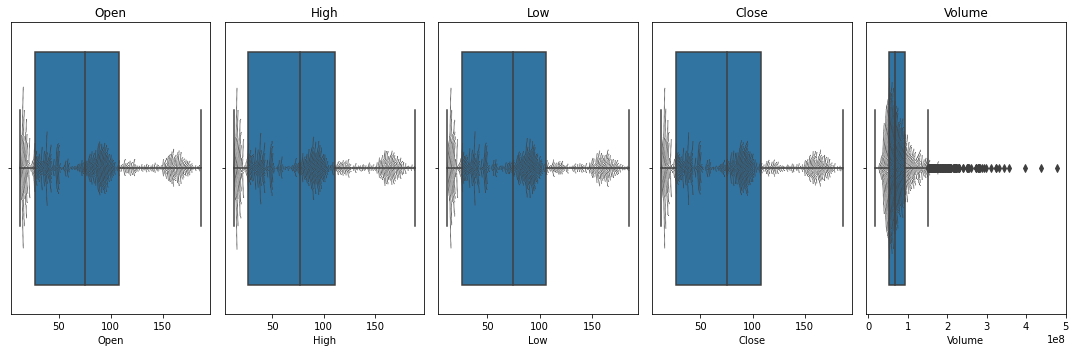

In [13]:
features = ["Open", "High", "Low", "Close", "Volume"]
AMZN_stock= pd.DataFrame()
for feature in features:
    AMZN_stock[feature] = AMZN_data[feature]

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))
for i, feature in enumerate(features):
    sns.boxplot(x=AMZN_stock[feature], ax=axes[i])
    sns.swarmplot(x=AMZN_stock[feature], color=".25",s=1, ax=axes[i])
    axes[i].set_title(feature)
    
plt.tight_layout()
plt.show()


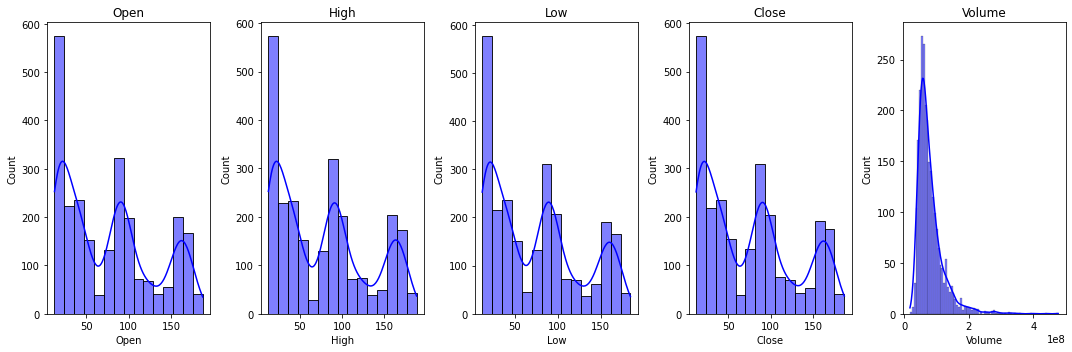

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15,5))
for i, feature in enumerate(features):
    sns.histplot(x=AMZN_stock[feature], ax=axes[i], kde=True,color="blue")
    axes[i].set_title(feature)
    
plt.tight_layout()
plt.show()

In [15]:
Q1 = AMZN_data['Volume'].quantile(0.25)
Q3 = AMZN_data['Volume'].quantile(0.75)
IQR = Q3 - Q1
outliers = (AMZN_data['Volume'] < Q1 - 1.5*IQR) | (AMZN_data['Volume'] > Q3 + 1.5*IQR)
volume_outliers = AMZN_data.loc[outliers, 'Volume']
print(volume_outliers.min())
print(volume_outliers.max())

151964000
477122000


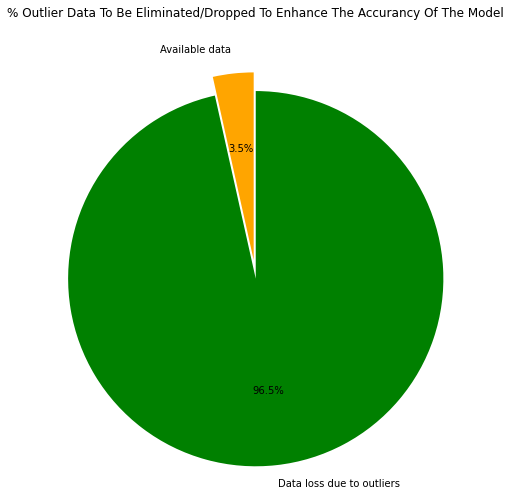

In [16]:
# Calculate the outlier percentage
Q1 = AMZN_data.quantile(0.25)
Q3 = AMZN_data.quantile(0.75)
IQR = Q3 - Q1
AMZN_data = AMZN_data.apply(pd.to_numeric, errors='coerce')
outlier_perc = 100 * ((AMZN_data < (Q1 - 1.5 * IQR)) | (AMZN_data > (Q3 + 1.5 * IQR))).sum(axis=1) / len(AMZN_data.columns)
total_outlier_perc = outlier_perc.sum()

# Create the labels for the plot
labels = ['Available data\n', 'Data loss due to outliers']
values = [100, total_outlier_perc]
colors = ['orange', 'green']
explode = (0, 0.1,)
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('% Outlier Data To Be Eliminated/Dropped To Enhance The Accurancy Of The Model\n\n')
plt.show()

# 3.FEATURE ENGINEERING

# 3.1 Historical stock price movements 

Over the years Amazon Stock prices has been rising significantly from as low as $13 to $178 

They has been a steadily increase since 2013 until mid 2018 where they was a sudden drop in stock prices.

Year 2021 experienced high stock prices of about $178 with year 2013 achieving the lowest 

Amazon's stock is have been relatively volatile, meaning that its price has been fluctuating significantly over short periods of time from 2019 to 2023

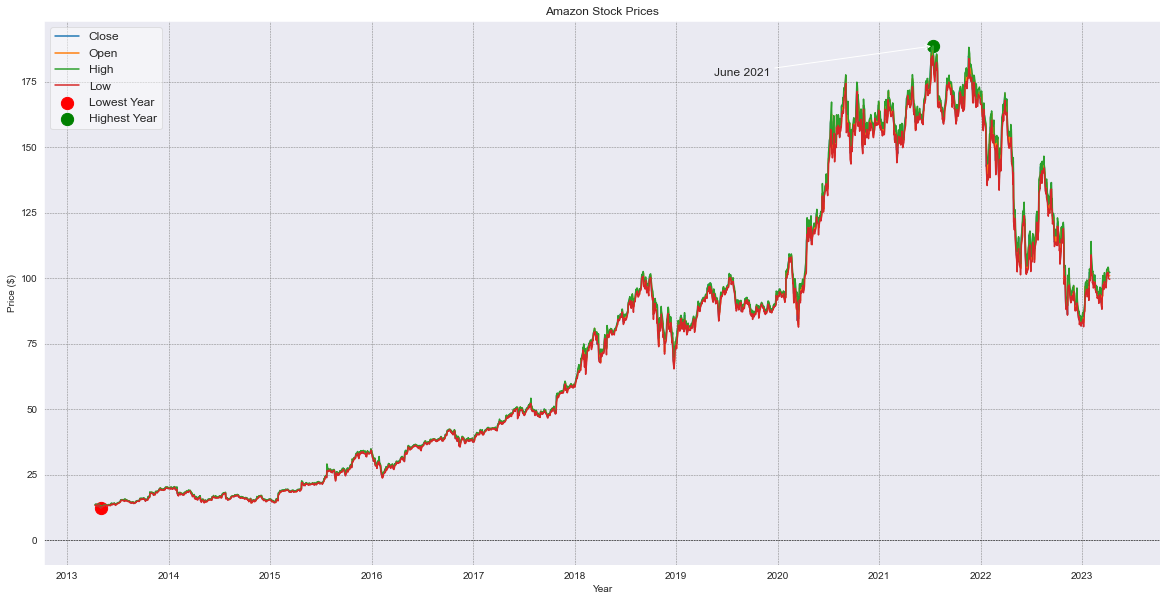

In [17]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(AMZN_data['Close'], label='Close')
ax.plot(AMZN_data['Open'], label='Open')
ax.plot(AMZN_data['High'], label='High')
ax.plot(AMZN_data['Low'], label='Low')
low_year = AMZN_data['Low'].idxmin()
high_year = AMZN_data['High'].idxmax()
ax.scatter(low_year, AMZN_data.loc[low_year, 'Low'], s=150, color='red', label='Lowest Year')
ax.scatter(high_year, AMZN_data.loc[high_year, 'High'], s=150, color='green', label='Highest Year')
ax.set_xlabel('Year')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon Stock Prices')
ax.legend(loc='upper left', frameon=True, facecolor='white', framealpha=0.5, fontsize='large')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.annotate("June 2021",xy=(AMZN_data['High'].idxmax(), AMZN_data['High'].max()), xytext=(0.6, 0.9),
            textcoords='axes fraction', arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3'),
            fontsize='large')
plt.show()



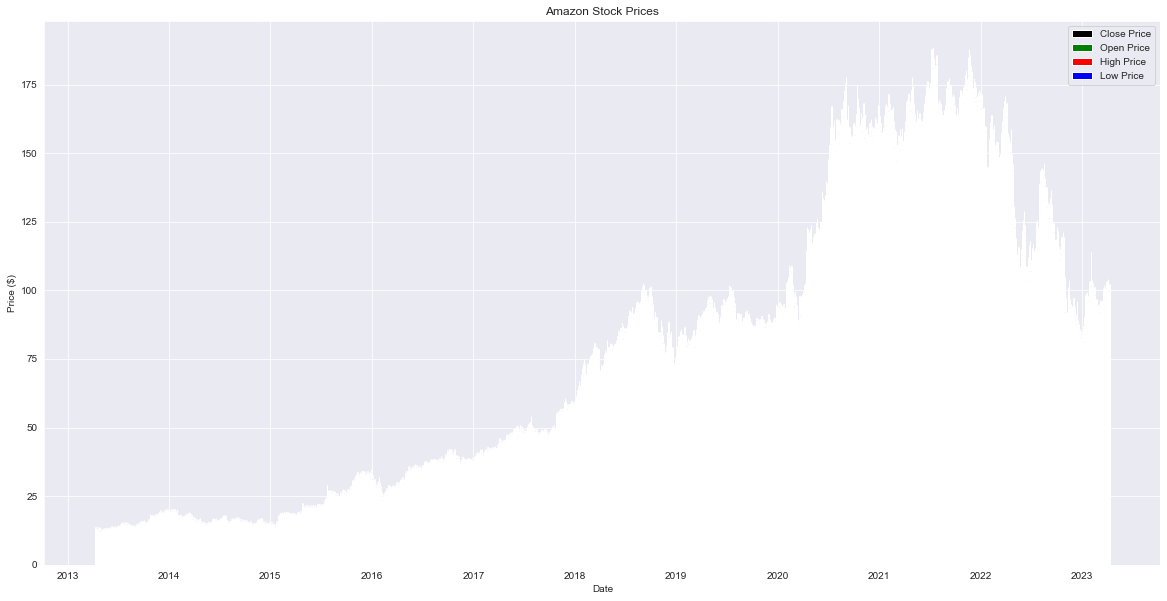

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(AMZN_data.index, AMZN_data['Close'], label='Close Price', color='black')
ax.bar(AMZN_data.index, AMZN_data['Open'], label='Open Price', color='green')
ax.bar(AMZN_data.index, AMZN_data['High'], label='High Price', color='red')
ax.bar(AMZN_data.index, AMZN_data['Low'], label='Low Price', color='blue')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon Stock Prices')
ax.legend(loc='best')

plt.show()

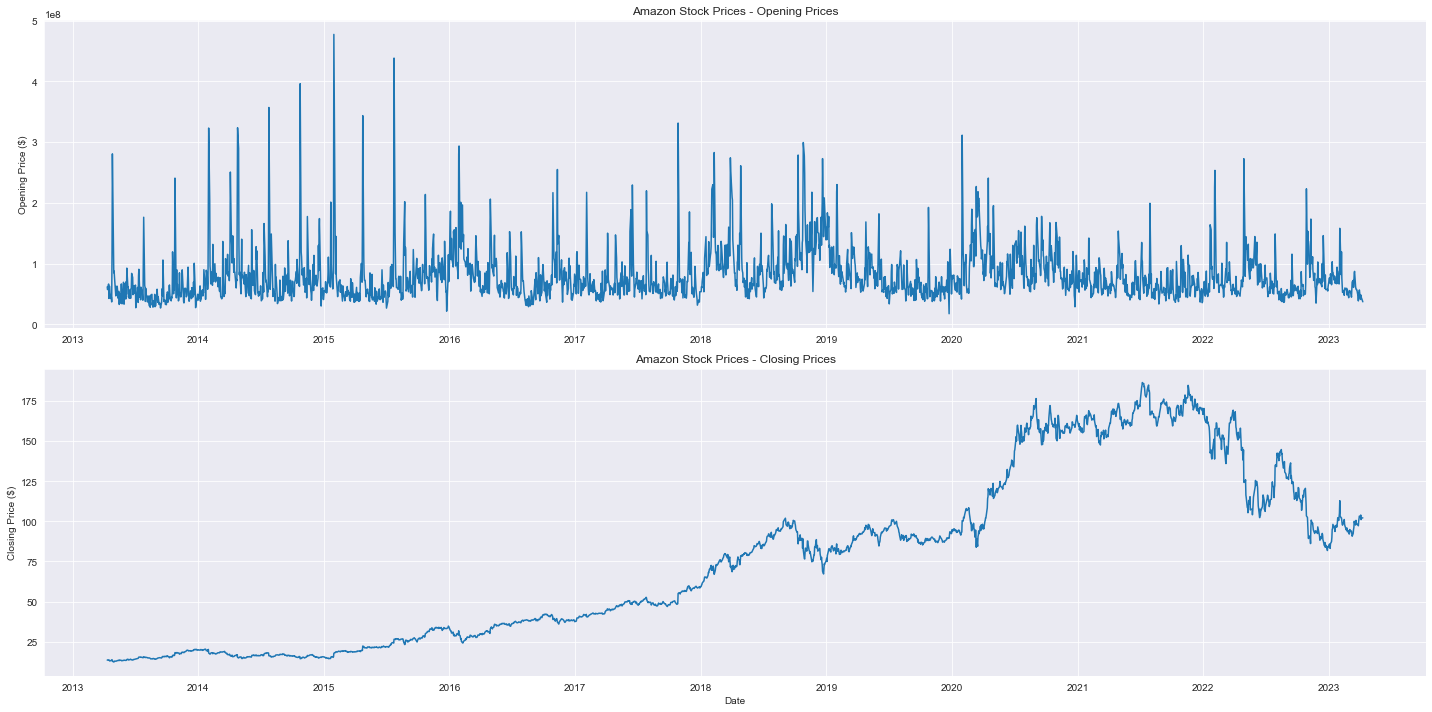

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
# plot opening prices on top subplot
axs[0].plot(AMZN_data['Open'].index, AMZN_data['Volume'])
axs[0].set_ylabel('Opening Price ($)')
axs[0].set_title('Amazon Stock Prices - Opening Prices')

# plot closing prices on bottom subplot
axs[1].plot(AMZN_data['Close'].index, AMZN_data['Close'])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Closing Price ($)')
axs[1].set_title('Amazon Stock Prices - Closing Prices')

plt.tight_layout()
plt.show()

# 3.2 Amazon Stock Perfomance 

Amazon daily returns exceeded the daily returns of the Nasdaq indicating great stock market perfomance 

The daily returns of Amazon have consistently exceeded the daily returns of the Nasdaq Composite index over a given time period. This indicates that Amazon has been outperforming the broader market represented by the Nasdaq Composite index.

Daily returns represent the percentage change in the stock price from one day to the next. When Amazon's daily returns exceed the daily returns of the Nasdaq Composite index, it suggests that Amazon is generating higher returns for its investors compared to the broader market. This could be due to several factors such as strong financial performance, positive news and announcements, or market dominance in its industry.

Amazon daily returns exceeded the daily returns of the S&P indicating great stock market performance

[*********************100%***********************]  1 of 1 completed


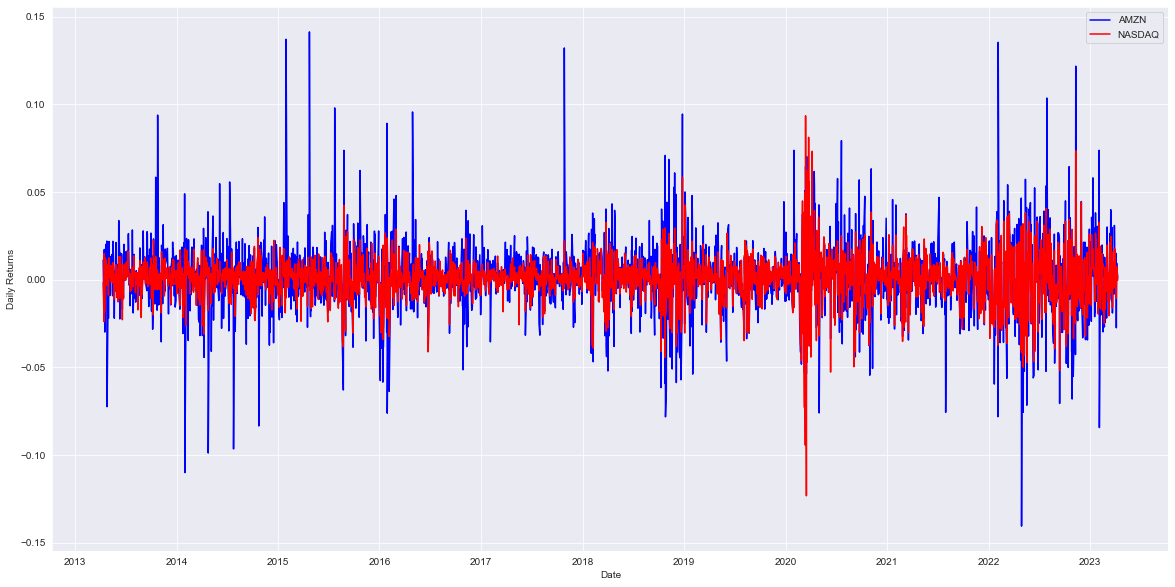

In [20]:
# Plot the daily returns of Amazon and NASDAQ
# Market perfomance relative to S&P bench mark 
nasdaq_data = yahoo_finance.download("^IXIC",start=start_date, end=end_date)


Daily_returns_AMZN = AMZN_data['Close'].pct_change()
Daily_returns_nasdaq_data = nasdaq_data['Close'].pct_change()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(Daily_returns_AMZN.index, Daily_returns_AMZN, label='AMZN',color="blue")
ax.plot(Daily_returns_nasdaq_data.index, Daily_returns_nasdaq_data, label='NASDAQ',color="red")
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns')
ax.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


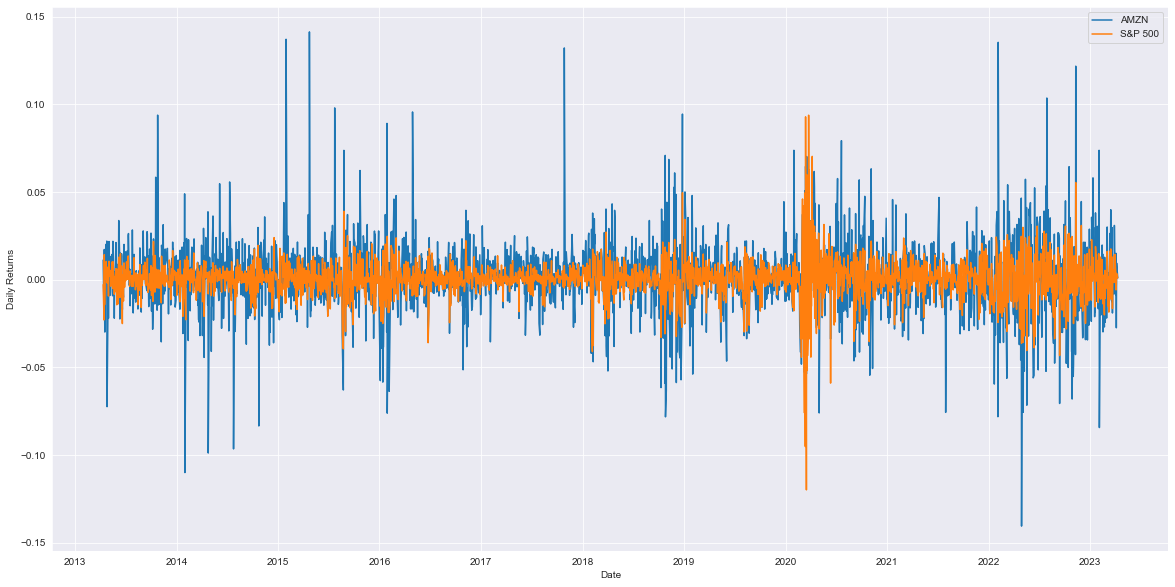

In [21]:
#Market perfomance relative to S&P bench mark 

S_and_P = yahoo_finance.download("^GSPC", start=start_date, end=end_date)

# Calculate daily returns
Daily_returns_AMZN = AMZN_data['Close'].pct_change()
Daily_returns_SP = S_and_P['Close'].pct_change()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(Daily_returns_AMZN .index,Daily_returns_AMZN, label='AMZN')
ax.plot(Daily_returns_SP.index,Daily_returns_SP, label='S&P 500')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns')
ax.legend()
plt.show()

# 3.3 Stock Market indicators (RSI)

The Relative Strength Index (RSI) is a technical indicator used in financial analysis to measure the strength of a security's price action. It is calculated using the average gains and losses of a security over a specified time period (typically 14 days) and is displayed on a scale of 0 to 100.

The RSI is considered a momentum oscillator that measures the magnitude and velocity of directional price movements. It is particularly useful for identifying overbought and oversold conditions in a security's price.

If the RSI is above 70, it suggests that the security is overbought, meaning that its price may be due for a correction. Conversely, if the RSI is below 30, it indicates that the security is oversold, meaning that its price may be due for a rebound.

Amazon experienced quite a few scenarios where the closing price was above the RSI of 70 and below RSI of low 30,this is a vital tool to analyse exit and buying points 

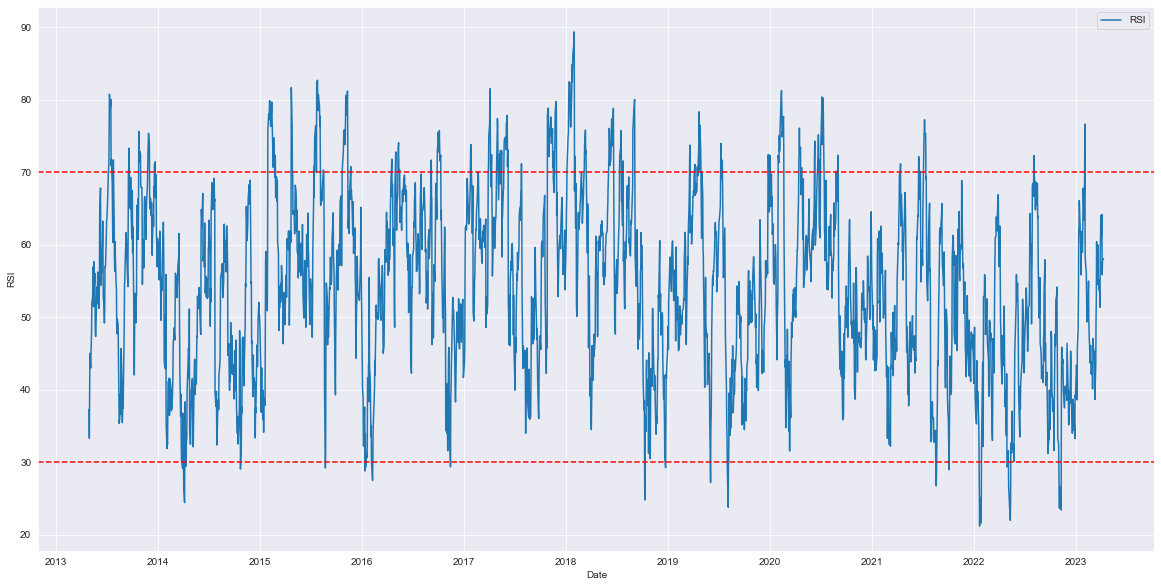

In [22]:
# Calculate the relative strength index (RSI) using the ta library

rsi_indicator = RSIIndicator(AMZN_data['Close'], window=14)
AMZN_data['RSI'] = rsi_indicator.rsi()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(AMZN_data.index, AMZN_data['RSI'], label='RSI')
ax.axhline(y=30, color='red', linestyle='--')
ax.axhline(y=70, color='red', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('RSI')
ax.legend()
plt.show()

# 3.4 Volume of trades 

This analysis establishes the volumes of trade with the highest and lowest points.

Volume of trades is a measure of market activity and will assist in determining the liquidity and price movements of a stock price

Amazon achieved most volume of trade in 2015 and least volume on trade in 2020

High trading volumes usually accompany significant price movements, which suggests strong market interest and participation.

Whilst low trading volumes may indicates a lack of investor interest or uncertainty in the market.

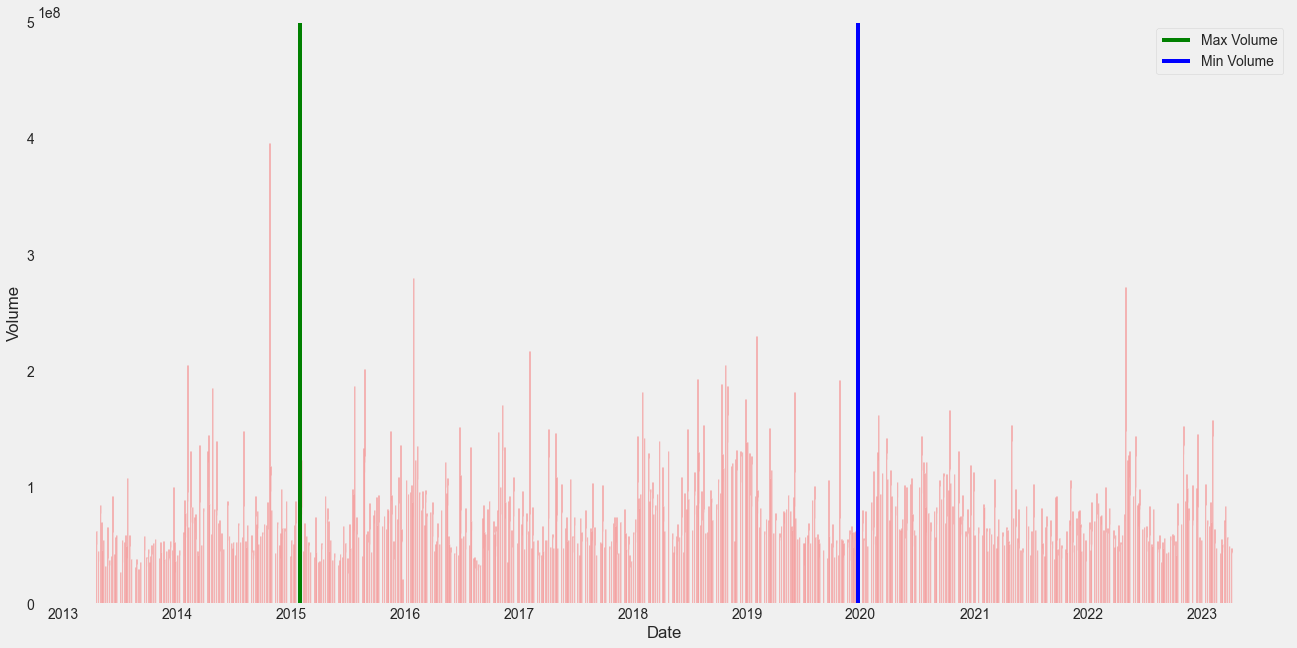

In [23]:
max_volume_date = AMZN_data.loc[AMZN_data['Volume'].idxmax()].name
min_volume_date = AMZN_data.loc[AMZN_data['Volume'].idxmin()].name

# Plot the volume of trades using a bar chart
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(AMZN_data.index, AMZN_data['Volume'], color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.axvline(x=max_volume_date, color='green', label='Max Volume')
ax.axvline(x=min_volume_date, color='blue', label='Min Volume')
ax.legend()
ax.grid(False)
plt.show()

# 3.5 Stock prices moving average 

The purpose of analyzing moving averages is to identify trends and patterns in a dataset. Moving averages smooth out the fluctuations in the data and highlight the underlying trends. 

By calculating the moving average of a stock price over a certain time period, we can get a clearer picture of whether the stock is trending upward or downward

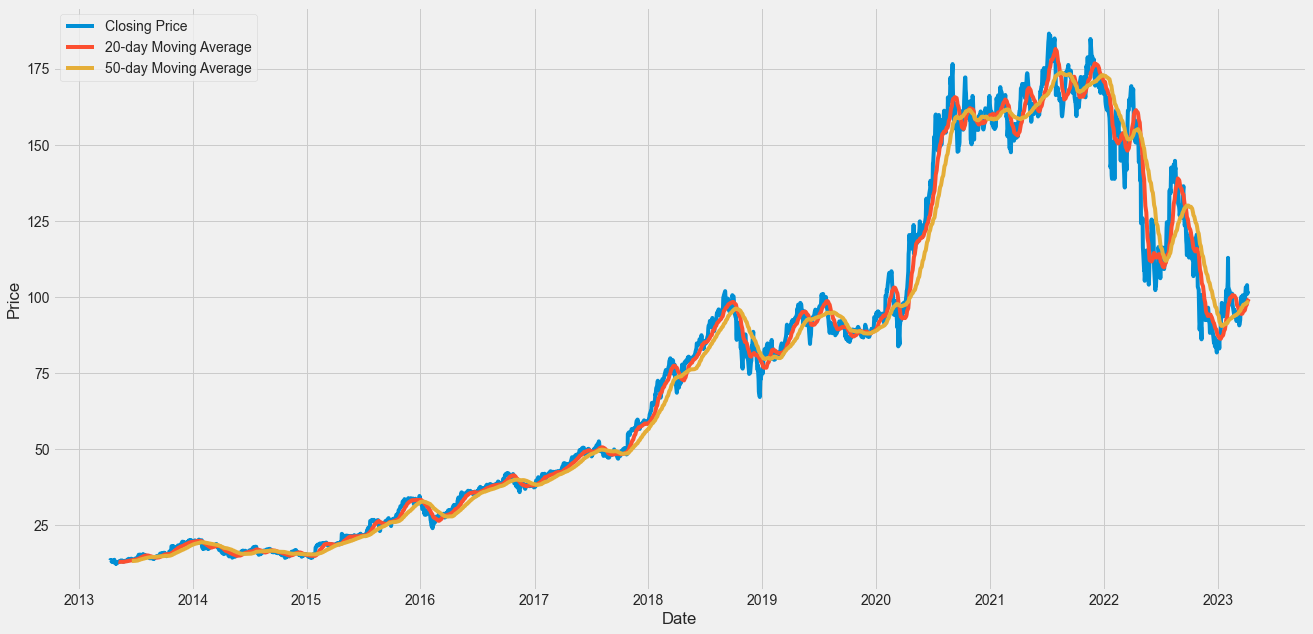

In [24]:
# Plot the closing prices and moving averages
moving_avg_20 = AMZN_data['Close'].rolling(window=20).mean()
moving_avg_50 = AMZN_data['Close'].rolling(window=50).mean()


fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(AMZN_data.index, AMZN_data['Close'], label='Closing Price')
ax.plot(moving_avg_20.index,moving_avg_20, label='20-day Moving Average')
ax.plot(moving_avg_50.index,moving_avg_50, label='50-day Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

plt.show()

# 3.6 Pairplot :Establish relationships,patterns and correlation

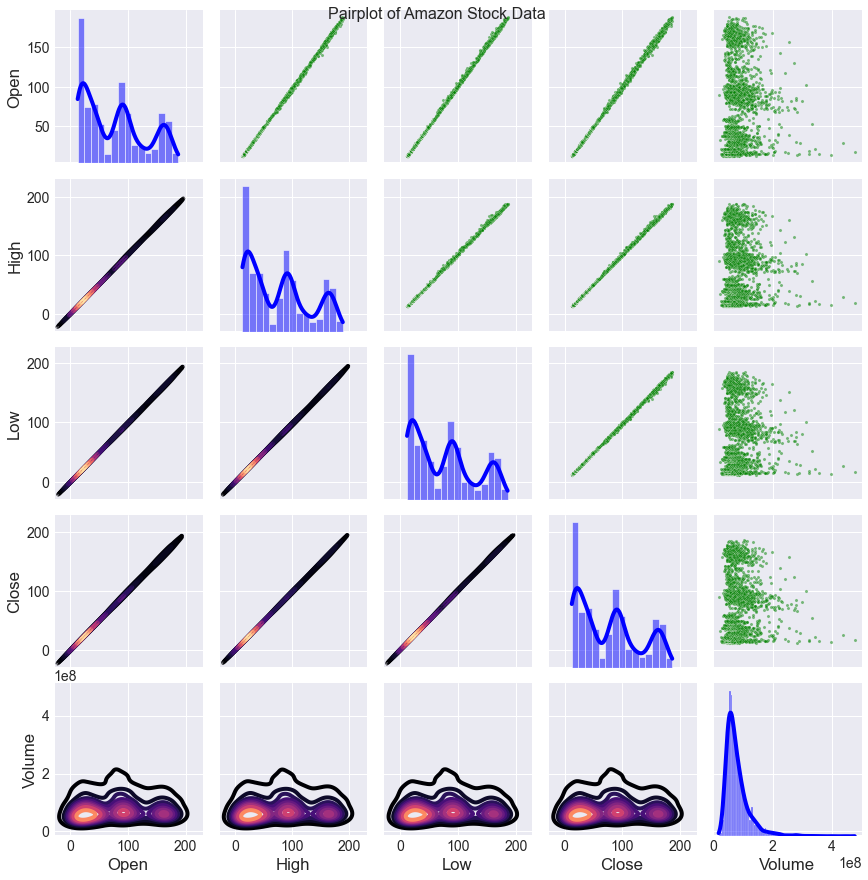

In [25]:
features_AMZN = AMZN_data[["Open", "High", "Low", "Close", "Volume"]]
sns.set_palette("Set2")
sns.set_style("darkgrid")
g = sns.PairGrid(features_AMZN, diag_sharey=False)
g.map_upper(sns.scatterplot, s=10, alpha=0.5,color="green")
g.map_diag(sns.histplot, kde=True,color ='blue' )
g.map_lower(sns.kdeplot, cmap="magma", thresh=0.05)
plt.suptitle("Pairplot of Amazon Stock Data\n\n\n", fontsize=16)
legend_labels = ["Open", "High", "Low", "Close", "Volume"]
handles = [plt.plot([],[], marker="o", ls="", color=sns.color_palette()[i])[0] for i in range(len(legend_labels))]

g.fig.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# 4. DATA PRE-PROCESSING 

# 4.1 Dropping outlier data/unrelated data(improve model perfomance)

In [26]:
AMZN_data['Volume'].shape


(2517,)

In [27]:
print(volume_outliers.min())
print(volume_outliers.max())

151964000
477122000


In [28]:
AMZN_data[AMZN_data['Volume'] >151964000]

,Open,High,Low,Close,Volume,RSI
Date,,,,,,
2013-04-26,13.498500,13.601000,12.640500,12.740500,280600000,NaN
2013-07-26,14.977500,15.681000,14.777500,15.600500,176350000,71.713985
2013-10-25,17.930000,18.420000,17.631001,18.169500,240736000,75.663869
2014-01-30,19.688499,20.312500,19.385000,20.150499,209478000,55.908881
2014-01-31,18.587999,18.772499,17.888000,17.934500,323096000,35.410122
...,...,...,...,...,...,...
2022-04-29,129.848999,130.761002,121.625000,124.281502,272662000,29.345901
2022-10-28,97.910004,103.959999,97.660004,103.410004,223133400,33.309477
2022-11-01,103.989998,104.580002,96.059998,96.790001,153370000,28.207111


In [29]:
AMZN_data= AMZN_data.drop(AMZN_data[AMZN_data['Volume'] >151964000].index, axis = 0)

In [30]:
AMZN_data.shape

(2380, 6)

In [31]:
AMZN_data=AMZN_data.drop('RSI',axis=1)

# 4.2 Data Normalisation 

In [32]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(AMZN_data)
scaled_AMZN_data = pd.DataFrame(scaled_data, columns=AMZN_data.columns)


# 5. DATA MODELLING

# 5.1 Data Modelling-Keras (time series)

In [33]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size

train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create the training data and labels
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [47]:
def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='relu'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_39 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_40 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_40 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_41 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_41 (Dropout)        (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 1)               

In [90]:
history = model.fit(X_train, y_train, epochs=50, batch_size= 32, validation_split=0.2)

Epoch 1/50
47/47 [==============================] - 9s 82ms/step - loss: 0.6199 - mean_absolute_error: 0.6717 - val_loss: 0.2224 - val_mean_absolute_error: 0.3919
Epoch 2/50
47/47 [==============================] - 3s 60ms/step - loss: 0.6181 - mean_absolute_error: 0.6653 - val_loss: 0.3214 - val_mean_absolute_error: 0.4782
Epoch 3/50
47/47 [==============================] - 3s 60ms/step - loss: 0.6182 - mean_absolute_error: 0.6659 - val_loss: 0.1856 - val_mean_absolute_error: 0.3549
Epoch 4/50
47/47 [==============================] - 3s 61ms/step - loss: 0.6177 - mean_absolute_error: 0.6632 - val_loss: 0.1910 - val_mean_absolute_error: 0.3587
Epoch 5/50
47/47 [==============================] - 3s 62ms/step - loss: 0.6176 - mean_absolute_error: 0.6630 - val_loss: 0.2717 - val_mean_absolute_error: 0.4274
Epoch 6/50
47/47 [==============================] - 3s 65ms/step - loss: 0.6175 - mean_absolute_error: 0.6622 - val_loss: 0.3342 - val_mean_absolute_error: 0.4721
Epoch 7/50
47/47 [====

# 5.2 Model prediction

In [99]:
X_test = []
y_test = AMZN_data.values[train_size:len(AMZN_data), :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [57]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = np.reshape(predicted_stock_price, (predicted_stock_price.shape[0], 1))
predicted_stock_price = scaler.inverse_transform(np.concatenate((predicted_stock_price, np.zeros((predicted_stock_price.shape[0], 4))), axis=1))[:, 0]


13/13 [==============================] - 0s 24ms/step


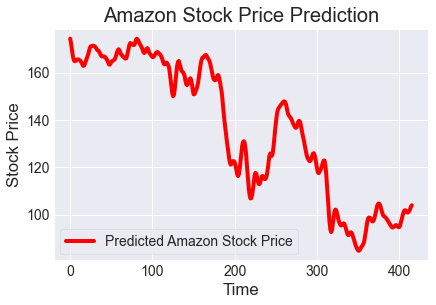

In [104]:
plt.plot(predicted_stock_price, color='red', label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 5.3 Model optimization 

In [87]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_36 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_37 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_37 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_38 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_38 (Dropout)        (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 1)               

In [88]:
history = model.fit(X_train, y_train, epochs=50, batch_size= 32, validation_split=0.2)

Epoch 1/50
47/47 [==============================] - 9s 98ms/step - loss: 0.0663 - mean_absolute_error: 0.1773 - val_loss: 0.1413 - val_mean_absolute_error: 0.3124
Epoch 2/50
47/47 [==============================] - 3s 62ms/step - loss: 0.0092 - mean_absolute_error: 0.0741 - val_loss: 0.2743 - val_mean_absolute_error: 0.4346
Epoch 3/50
47/47 [==============================] - 3s 64ms/step - loss: 0.0086 - mean_absolute_error: 0.0713 - val_loss: 0.2364 - val_mean_absolute_error: 0.4033
Epoch 4/50
47/47 [==============================] - 3s 65ms/step - loss: 0.0081 - mean_absolute_error: 0.0688 - val_loss: 0.2129 - val_mean_absolute_error: 0.3819
Epoch 5/50
47/47 [==============================] - 3s 64ms/step - loss: 0.0083 - mean_absolute_error: 0.0707 - val_loss: 0.1995 - val_mean_absolute_error: 0.3722
Epoch 6/50
47/47 [==============================] - 3s 66ms/step - loss: 0.0070 - mean_absolute_error: 0.0657 - val_loss: 0.2143 - val_mean_absolute_error: 0.3861
Epoch 7/50
47/47 [====

# 6. MODEL SUMMARY 

# 6.1 Model outcome 

# 6.2 Project Summary/Conclusion